In [1]:
import gym
# Import packages
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
from typing import List, Tuple

import collections
from collections import namedtuple, deque
import tqdm
import matplotlib.pyplot as plt
import random

from IPython.display import clear_output
from IPython import display

%matplotlib inline

In [2]:
torch.manual_seed(0)
np.random.seed(0)

In [4]:
# Create CartPole environment
env = gym.make('CartPole-v0', render_mode=None)
try:
    state, _ = env.reset()
except:
    state = env.reset()

# Run the environment for 100 steps
for i in range(100):
    # Display the current state of the environment
    #plt.imshow(env.render())
    #display.display(plt.gcf())
    #display.clear_output(wait=True)
    
    # Choose a random action from the action space
    action = env.action_space.sample()
    
    # Take the chosen action and observe the next state, reward, and termination status
    state, reward, terminated, truncated, info = env.step(action)
    
    # If the episode is terminated or truncated, reset the environment
    if terminated or truncated:
        state, info = env.reset()

# Close the environment after exploration
env.close()
print("Env. simulation complete")

Env. simulation complete


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
# Set environment and training parameters
from utils import DQN_Agent

env_name = 'CartPole-v0'
num_episodes_train = 200
num_episodes_test = 20
learning_rate = 5e-4

# Create the environment
env = gym.make(env_name)
action_space_size = env.action_space.n
state_space_size = 4

# Plot average performance of 5 trials
num_seeds = 5
l = num_episodes_train // 10
res = np.zeros((num_seeds, l))
gamma = 0.99

# Loop over multiple seeds
for i in tqdm.tqdm(range(num_seeds)):
    reward_means = []

    # Create an instance of the DQN_Agent class
    agent = DQN_Agent(env_name, lr=learning_rate)

    # Training loop
    for m in range(num_episodes_train):
        agent.train()

        # Evaluate the agent every 10 episodes during training
        if m % 10 == 0:
            print("Episode: {}".format(m))

            # Evaluate the agent's performance over 20 test episodes
            G = np.zeros(num_episodes_test)
            for k in range(num_episodes_test):
                g = agent.test()
                G[k] = g

            reward_mean = G.mean()
            reward_sd = G.std()
            print(f"The test reward for episode {m} is {reward_mean} with a standard deviation of {reward_sd}.")
            reward_means.append(reward_mean)

    res[i] = np.array(reward_means)

  0%|          | 0/5 [00:00<?, ?it/s]

Episode: 0
The test reward for episode 0 is 88.05 with a standard deviation of 24.882674695458288.
Episode: 10
The test reward for episode 10 is 9.4 with a standard deviation of 0.9165151389911681.
Episode: 20
The test reward for episode 20 is 9.3 with a standard deviation of 0.714142842854285.
Episode: 30
The test reward for episode 30 is 9.2 with a standard deviation of 0.6782329983125268.
Episode: 40
The test reward for episode 40 is 18.15 with a standard deviation of 7.122324058900999.
Episode: 50
The test reward for episode 50 is 13.55 with a standard deviation of 1.8296174463531987.
Episode: 60
The test reward for episode 60 is 10.85 with a standard deviation of 1.0136567466356647.
Episode: 70
The test reward for episode 70 is 11.25 with a standard deviation of 1.479019945774904.
Episode: 80
The test reward for episode 80 is 49.35 with a standard deviation of 31.490117497399087.
Episode: 90
The test reward for episode 90 is 147.5 with a standard deviation of 45.918950336435174.
E

 20%|██        | 1/5 [00:25<01:43, 26.00s/it]

Episode: 0
The test reward for episode 0 is 9.35 with a standard deviation of 0.7262919523166976.
Episode: 10
The test reward for episode 10 is 9.25 with a standard deviation of 0.9420721840708386.
Episode: 20
The test reward for episode 20 is 9.1 with a standard deviation of 0.7681145747868608.
Episode: 30
The test reward for episode 30 is 9.3 with a standard deviation of 0.7810249675906654.
Episode: 40
The test reward for episode 40 is 9.4 with a standard deviation of 0.66332495807108.
Episode: 50
The test reward for episode 50 is 9.7 with a standard deviation of 0.45825756949558405.
Episode: 60
The test reward for episode 60 is 9.45 with a standard deviation of 0.5894913061275798.
Episode: 70
The test reward for episode 70 is 9.2 with a standard deviation of 0.7483314773547882.
Episode: 80
The test reward for episode 80 is 120.75 with a standard deviation of 59.97489057930827.
Episode: 90
The test reward for episode 90 is 98.95 with a standard deviation of 45.59218683064018.
Episode

 40%|████      | 2/5 [00:53<01:20, 26.84s/it]

Episode: 0
The test reward for episode 0 is 10.6 with a standard deviation of 1.1135528725660042.
Episode: 10
The test reward for episode 10 is 9.25 with a standard deviation of 0.5361902647381804.
Episode: 20
The test reward for episode 20 is 9.2 with a standard deviation of 0.7483314773547882.
Episode: 30
The test reward for episode 30 is 9.25 with a standard deviation of 0.698212002188447.
Episode: 40
The test reward for episode 40 is 9.55 with a standard deviation of 0.49749371855331004.
Episode: 50
The test reward for episode 50 is 27.5 with a standard deviation of 15.008331019803634.
Episode: 60
The test reward for episode 60 is 27.25 with a standard deviation of 3.1760824926314495.
Episode: 70
The test reward for episode 70 is 73.35 with a standard deviation of 9.30738953735149.
Episode: 80
The test reward for episode 80 is 142.15 with a standard deviation of 26.302613938542308.
Episode: 90
The test reward for episode 90 is 192.3 with a standard deviation of 14.09645345468143.
E

 60%|██████    | 3/5 [01:20<00:53, 26.75s/it]

Episode: 0
The test reward for episode 0 is 9.4 with a standard deviation of 0.5830951894845301.
Episode: 10
The test reward for episode 10 is 9.5 with a standard deviation of 0.806225774829855.
Episode: 20
The test reward for episode 20 is 9.25 with a standard deviation of 0.7664854858377946.
Episode: 30
The test reward for episode 30 is 9.4 with a standard deviation of 0.7999999999999999.
Episode: 40
The test reward for episode 40 is 14.0 with a standard deviation of 1.8973665961010275.
Episode: 50
The test reward for episode 50 is 16.9 with a standard deviation of 2.3000000000000003.
Episode: 60
The test reward for episode 60 is 47.45 with a standard deviation of 13.388334474459473.
Episode: 70
The test reward for episode 70 is 55.3 with a standard deviation of 12.981140165640305.
Episode: 80
The test reward for episode 80 is 191.4 with a standard deviation of 19.47151766041877.
Episode: 90
The test reward for episode 90 is 194.75 with a standard deviation of 11.152914417317117.
Epi

 80%|████████  | 4/5 [01:49<00:27, 27.99s/it]

Episode: 0
The test reward for episode 0 is 9.1 with a standard deviation of 0.6244997998398398.
Episode: 10
The test reward for episode 10 is 9.5 with a standard deviation of 0.7416198487095663.
Episode: 20
The test reward for episode 20 is 9.25 with a standard deviation of 0.7664854858377946.
Episode: 30
The test reward for episode 30 is 9.4 with a standard deviation of 0.5830951894845301.
Episode: 40
The test reward for episode 40 is 9.25 with a standard deviation of 0.8874119674649424.
Episode: 50
The test reward for episode 50 is 9.55 with a standard deviation of 0.6689544080129824.
Episode: 60
The test reward for episode 60 is 9.25 with a standard deviation of 0.7664854858377946.
Episode: 70
The test reward for episode 70 is 9.4 with a standard deviation of 0.58309518948453.
Episode: 80
The test reward for episode 80 is 27.55 with a standard deviation of 4.055551750378733.
Episode: 90
The test reward for episode 90 is 56.4 with a standard deviation of 19.142622599842475.
Episode:

100%|██████████| 5/5 [02:13<00:00, 26.68s/it]


Text(0, 0.5, 'Avg. Return')

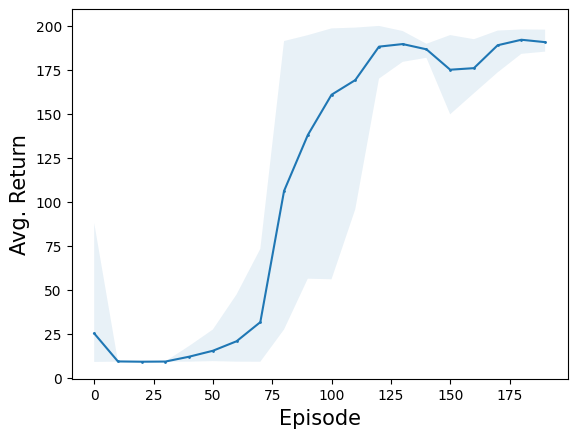

In [6]:
ks = np.arange(l) * 10
avs = np.mean(res, axis=0)
maxs = np.max(res, axis=0)
mins = np.min(res, axis=0)

plt.fill_between(ks, mins, maxs, alpha=0.1)
plt.plot(ks, avs, '-o', markersize=1)

plt.xlabel('Episode', fontsize=15)
plt.ylabel('Avg. Return', fontsize=15)

In [7]:
print(type(agent.policy_net))

<class 'DQNAgent.QNetwork'>


In [8]:
torch.save(agent.policy_net.net.state_dict(), "model/agent.pt")

In [16]:
from utils import FullyConnectedModel
model = FullyConnectedModel(4, 2)
model.load_state_dict(torch.load("model/agent.pt"))

<All keys matched successfully>

In [17]:
model.eval()

FullyConnectedModel(
  (linear1): Linear(in_features=4, out_features=16, bias=True)
  (activation1): ReLU()
  (linear2): Linear(in_features=16, out_features=16, bias=True)
  (activation2): ReLU()
  (linear3): Linear(in_features=16, out_features=16, bias=True)
  (activation3): ReLU()
  (output_layer): Linear(in_features=16, out_features=2, bias=True)
)

In [24]:
state = env.reset()
print(state)

(array([ 0.0486797 ,  0.01870995,  0.02033729, -0.03671968], dtype=float32), {})


In [25]:
state[0]

array([ 0.0486797 ,  0.01870995,  0.02033729, -0.03671968], dtype=float32)

In [26]:
state = torch.FloatTensor(state[0]).unsqueeze(0)  # Convert state to tensor and add batch dimension

In [28]:
with torch.no_grad():  # No need to compute gradients for evaluation
    action_values = model(state)
    action = torch.argmax(action_values).item()
    print(action)

0


In [30]:
state, reward, terminated, truncated, _ = env.step(action)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [32]:
state = torch.FloatTensor(state).unsqueeze(0)  # Convert state to tensor and add batch dimension

In [33]:
with torch.no_grad():  # No need to compute gradients for evaluation
    action_values = model(state)
    print(action_values)

tensor([[310.1584, 310.7754]])


In [34]:
with torch.no_grad():  # No need to compute gradients for evaluation
    action_values = model(state)
    action = torch.argmax(action_values).item()
    print(action)

1
